##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**PROJECT - MACHINE LEARNING FOR SUSTAINABLE DEVELOPMENT GOALS (SDGs)**
--------------------------------------------------------------------------------
***Team number:*** 16

---
(*In Title case, separated with commas*)
***Full names of all students in the team:*** Aryan Gupta, Mihir Kulkarni, Vaibhav Khanna, Darsh Shani

---
(*Separated by commas*)
***Id number of all students in the team:*** 2021A7PS0162H, 2021A7PS2689H, 2021A7PS2819H, 2021A7PS2171H


Please refer to the email providing the assignment of project and follow the instructions provided in the project brief.


# **_1. Preprocessing of Dataset_**

### The respective dataset has been shared in the project brief. Please refer to it.

## Making Required Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
# removing irrelevant deprecation warnings
warnings.filterwarnings('ignore',category=FutureWarning)

## Loading the Dataset

In [2]:
dataset = pd.read_csv("Team16_Carbon_Emissions.csv")
dataset.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Checking for Null or Missing Values in the Dataset

In [8]:
dataset.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [9]:
dataset[dataset == 0].count()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

**Inference**: No null or 0 values are present in the dataset.

## Checking for Duplicated Data in the Dataset

In [10]:
print("Number of duplicates:", dataset.duplicated().sum())
# print unique duplicated rows
print("Number of duplicated unique rows:", dataset[dataset.duplicated(keep=False)].drop_duplicates().shape)

Number of duplicates: 1103
Number of duplicated unique rows: (999, 12)


**Inference**: We see 1103 duplicates of 999 unique rows in the data. 
Why should we remove duplicates?
1. The duplicates only lead to overfitting and bias for our dataset, since the feature AND the target values are the same (since we consider a complete row in the dataset for duplicate identification).
2. The target variable (CO2 emmisions) is continuous. Thus, the duplicates are a result of error in data retrieval.

### Removing Duplicates

In [3]:
dataset = dataset.drop_duplicates()

## Getting Dataset info After Cleaning

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6282 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              6282 non-null   object 
 1   Model                             6282 non-null   object 
 2   Vehicle Class                     6282 non-null   object 
 3   Engine Size(L)                    6282 non-null   float64
 4   Cylinders                         6282 non-null   int64  
 5   Transmission                      6282 non-null   object 
 6   Fuel Type                         6282 non-null   object 
 7   Fuel Consumption City (L/100 km)  6282 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   6282 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  6282 non-null   float64
 10  Fuel Consumption Comb (mpg)       6282 non-null   int64  
 11  CO2 Emissions(g/km)               6282 non-null   int64  
dtypes: float64(

In [13]:
# printing the unique values in all columns
# out of these the values in catagorical columns are informativ
for col in dataset.select_dtypes(include="object").columns:
  print(col, len(dataset[col].unique()))

Make 42
Model 2053
Vehicle Class 16
Transmission 27
Fuel Type 5


**Inference**: The dataset contains 5 qualitative columns (indicated by data type object), these are nominal catagorical columns and cannot be represented as integers. Out of these columns *Model* has 2053 unique values, 42 for *Make*, 16 for *Vehicle class*, 27 for *Transmission* and 5 for *Fuel Type*. 

In [14]:
print(dataset["Model"].value_counts().mean())
dataset["Model"].value_counts()

3.059912323429128


Model
F-150 FFV             32
F-150 FFV 4X4         31
MUSTANG               27
FOCUS FFV             24
F-150 4X4             20
                      ..
LS 500                 1
LS 500h                1
NX 300 AWD F SPORT     1
RX 350 L AWD           1
XC40 T4 AWD            1
Name: count, Length: 2053, dtype: int64

**Note**: There are 2053 unique values for the *Model* field on printing its distribution, we see that on average there are only 3 datapoints per value of the column. There are far too little instances of multiple models to fairly compare them to eachother. Not only this, but binarising this value in the next step would be extremely messy, producing 2053 new columns. Thus we drop this column.

### Dropping "Model"

In [4]:
dataset.drop("Model", axis = 1, inplace = True)

### Description of the numerical columns

In [16]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),6282.0,3.161812,1.365201,0.9,2.0,3.0,3.7,8.4
Cylinders,6282.0,5.618911,1.846250,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),6282.0,12.610220,3.553066,4.2,10.1,12.1,14.7,30.6
Fuel Consumption Hwy (L/100 km),6282.0,9.070583,2.278884,4.0,7.5,8.7,10.3,20.6
Fuel Consumption Comb (L/100 km),6282.0,11.017876,2.946876,4.1,8.9,10.6,12.7,26.1
Fuel Consumption Comb (mpg),6282.0,27.411016,7.245318,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),6282.0,251.157752,59.290426,96.0,208.0,246.0,289.0,522.0


**Inferences**:
1. The range of our target *CO2 Emissions* is between 96 and 522.
2. Mean *CO2 Emissions* is 250.58 and median is 246.
3. All the features are positively skewed (max is much greater than 75th percentile).
4. *Fuel Consumption Hwy (L/100 km)* seems significantly more skewed than the other features.
5. *CO2 Emissions(g/km)* is the least skewed feature.

## Initial Data Plots

### Exploring Categorical Features impact on co2 emmisions

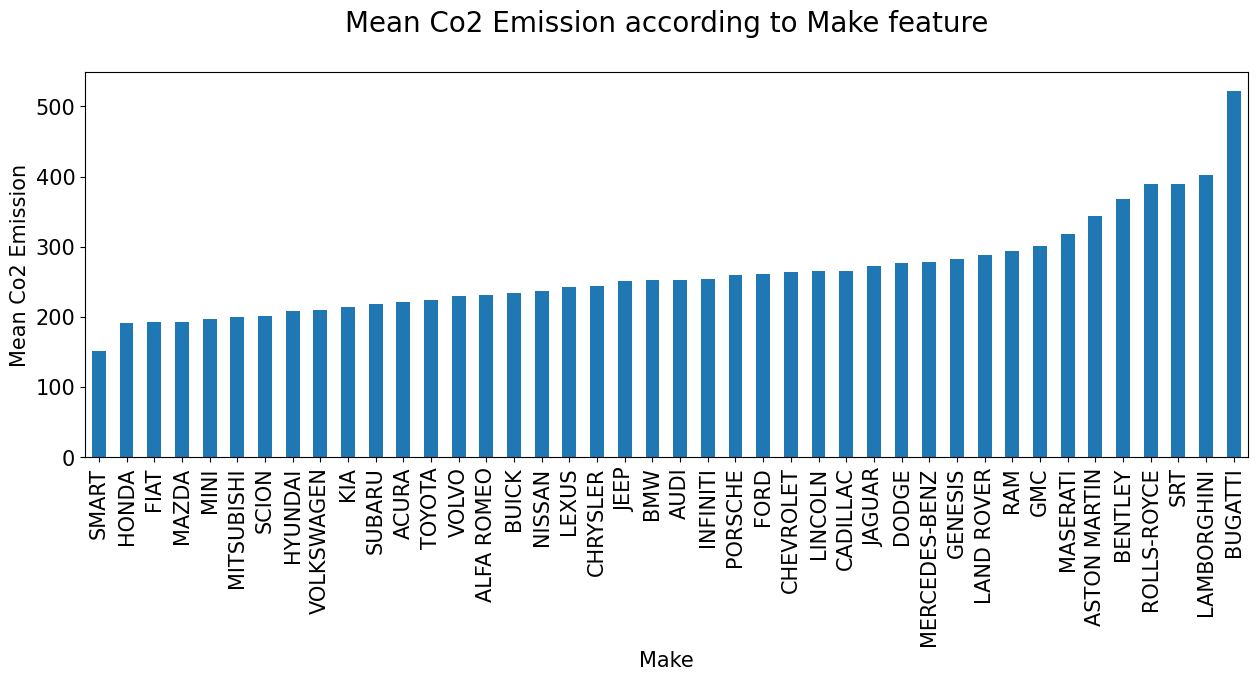

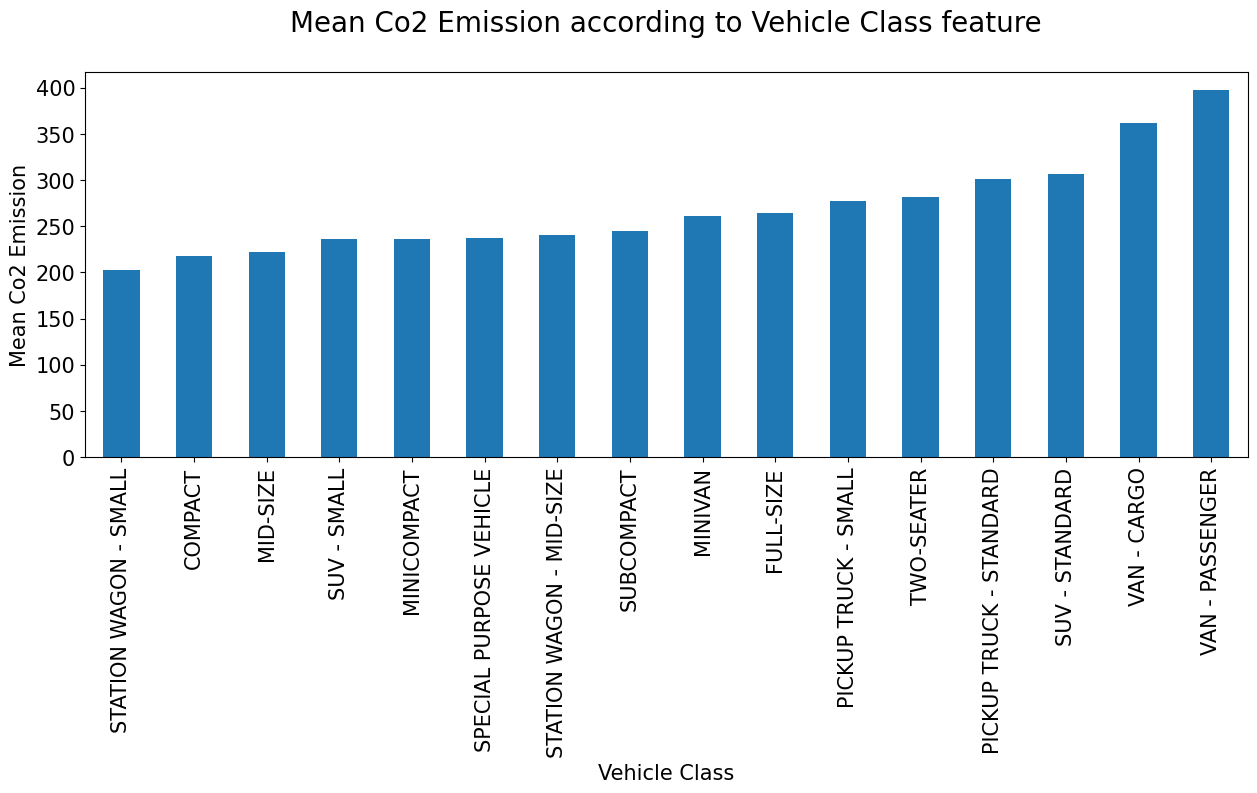

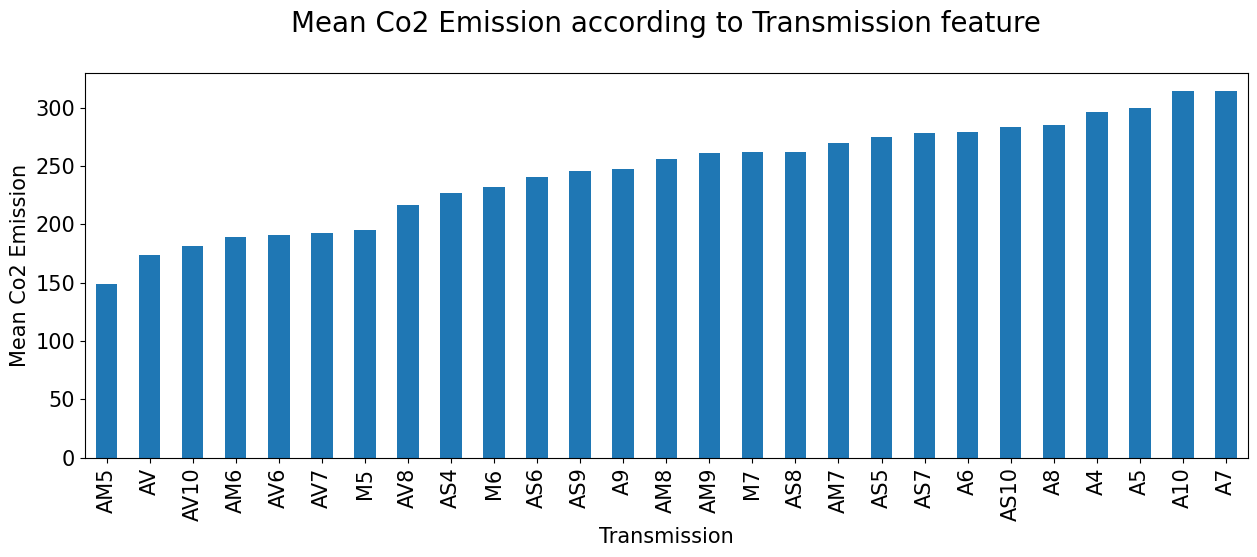

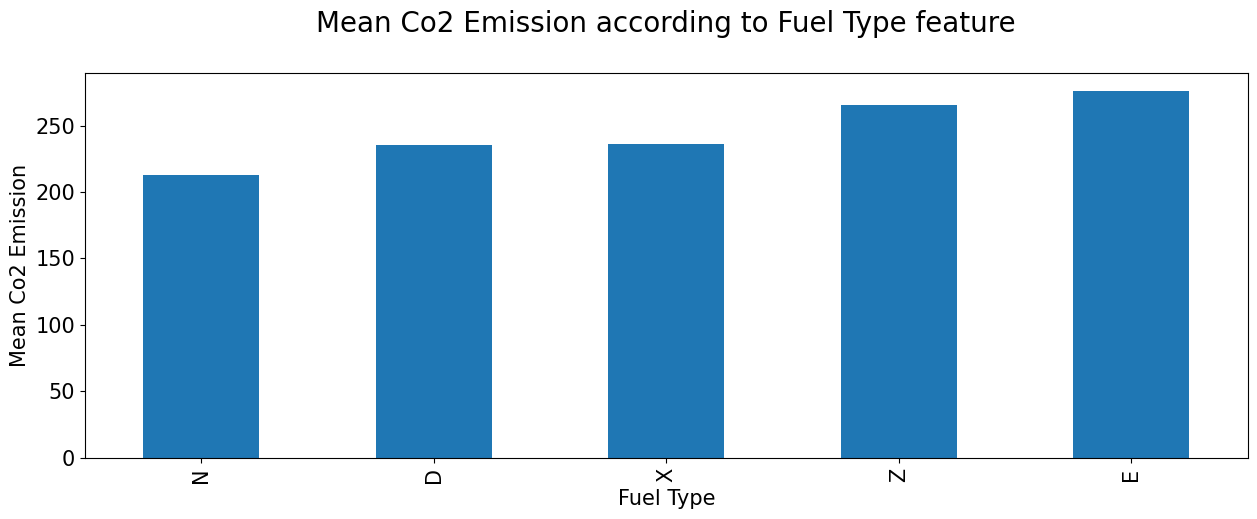

In [17]:
def explore_categorical_feature(feature):
  group = dataset.groupby(feature)
  plt.figure(figsize=[15,5])
  plots = group['CO2 Emissions(g/km)'].mean().sort_values().plot(kind = 'bar', fontsize=15)
  plt.xlabel(feature, fontsize=15)
  plt.ylabel('Mean Co2 Emission', fontsize=15)
  plt.title("Mean Co2 Emission according to {} feature\n".format(feature), fontsize=20)
  plt.show()
for feature in ["Make", 'Vehicle Class', 'Transmission', 'Fuel Type']:
  explore_categorical_feature(feature)

**Inferences**: 
1. According to aboce plots: Cars of luxurious *Make* tend to have more co2 emmisions than economic cars. Bugatti, Lamborghini lie on the higher end, while Honda, Mitsubishi lie on the lower end.
2. Other plots are not as conclusive, larger *Vehicle Class* tends to have more emmisions, but two-wheelers seem to be an exception. 
3. *Transmission* is inconclusive on its own. We combine all gears of a single transmission type into one, to increase the quality of data.
4. We see slight increase in emissions with the type of fuel used.

### Merging Transmission Gears

In [5]:
dataset["Transmission"] = np.where(dataset["Transmission"].isin(["A4", "A5", "A6", "A7", "A8", "A9", "A10"]), "automatic", dataset["Transmission"])
dataset["Transmission"] = np.where(dataset["Transmission"].isin(["AM5", "AM6", "AM7", "AM8", "AM9"]), "automated_manual", dataset["Transmission"])
dataset["Transmission"] = np.where(dataset["Transmission"].isin(["AS4", "AS5", "AS6", "AS7", "AS8", "AS9", "AS10"]), "automatic_with_select_shift", dataset["Transmission"])
dataset["Transmission"] = np.where(dataset["Transmission"].isin(["AV", "AV6", "AV7", "AV8", "AV10"]), "continuously_variable", dataset["Transmission"])
dataset["Transmission"] = np.where(dataset["Transmission"].isin(["M5", "M6", "M7"]), "manual", dataset["Transmission"])

### Checking Transmission After Merge

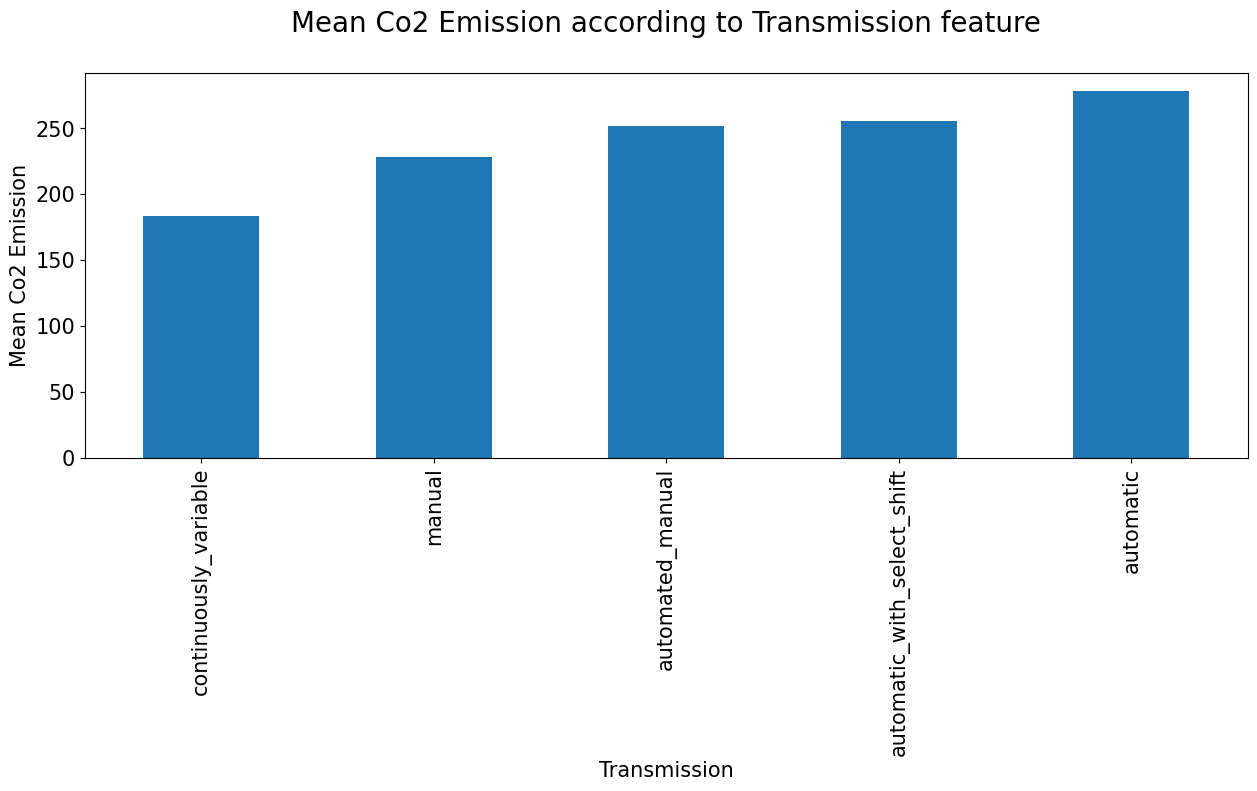

In [19]:
group = dataset.groupby("Transmission")
plt.figure(figsize=[15,5])
plots = group['CO2 Emissions(g/km)'].mean().sort_values().plot(kind = 'bar', fontsize=15)
plt.xlabel("Transmission", fontsize=15)
plt.ylabel('Mean Co2 Emission', fontsize=15)
plt.title("Mean Co2 Emission according to {} feature\n".format("Transmission"), fontsize=20)
plt.show()

**Inference**: After the merge, we gain conclusive observation that Automatic has the highest emissions, while Continuously Variable has the lowest.

### Exploring frequencies of categorical features

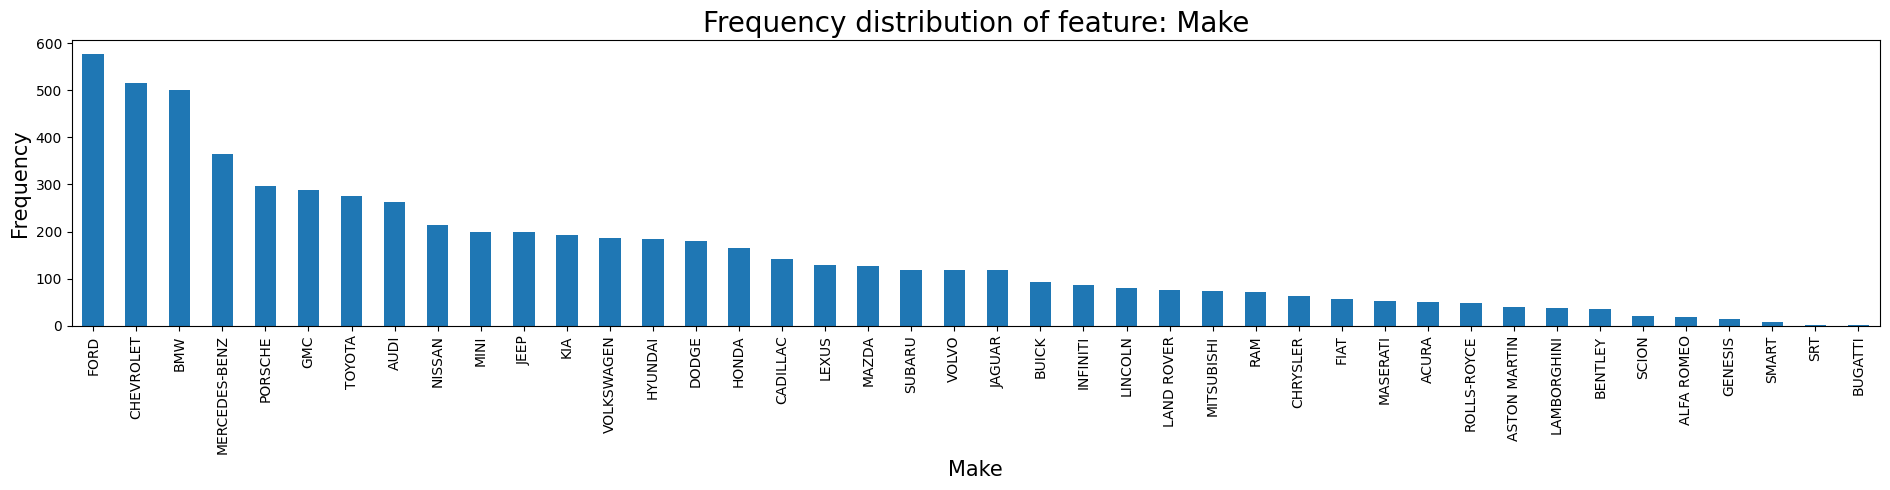

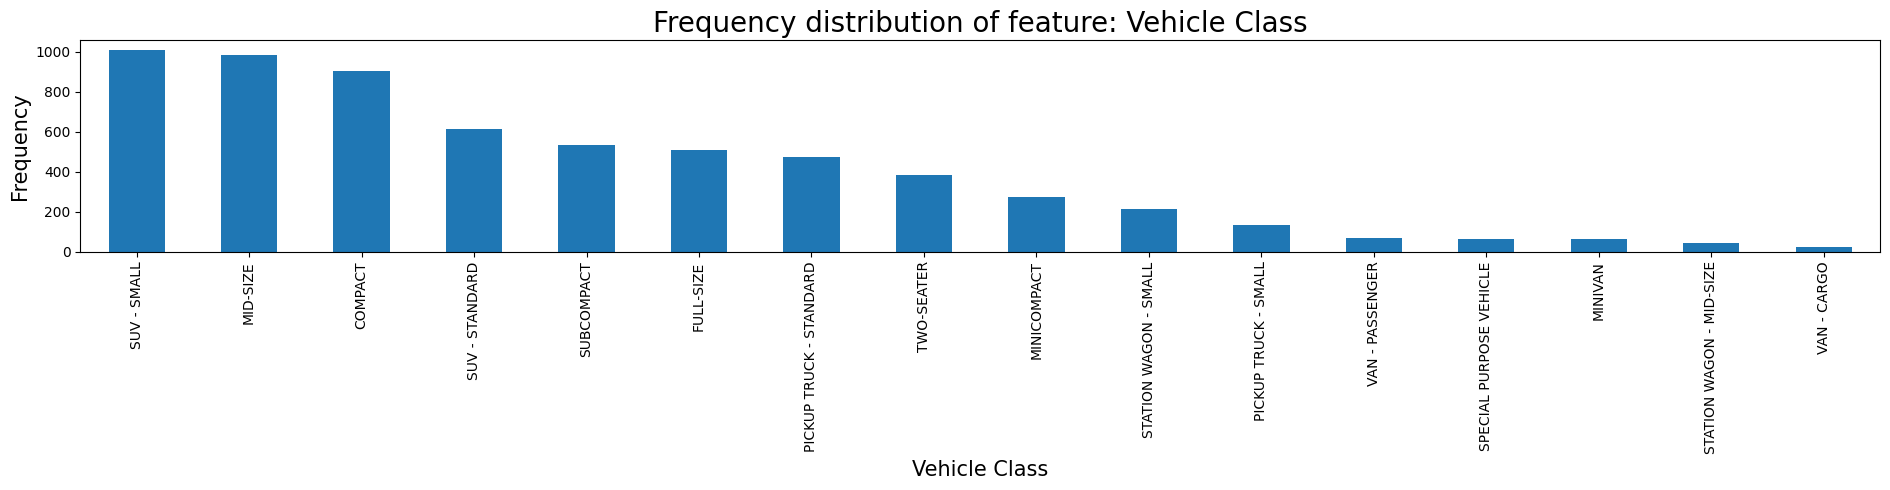

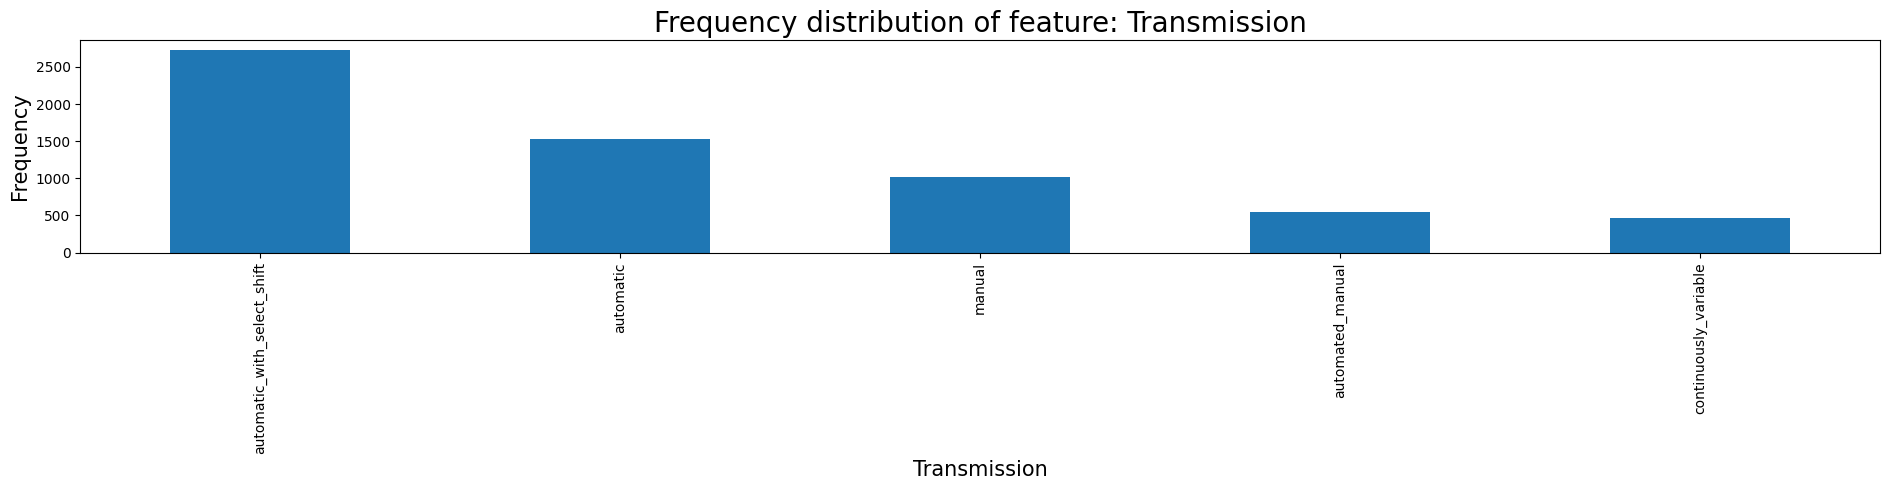

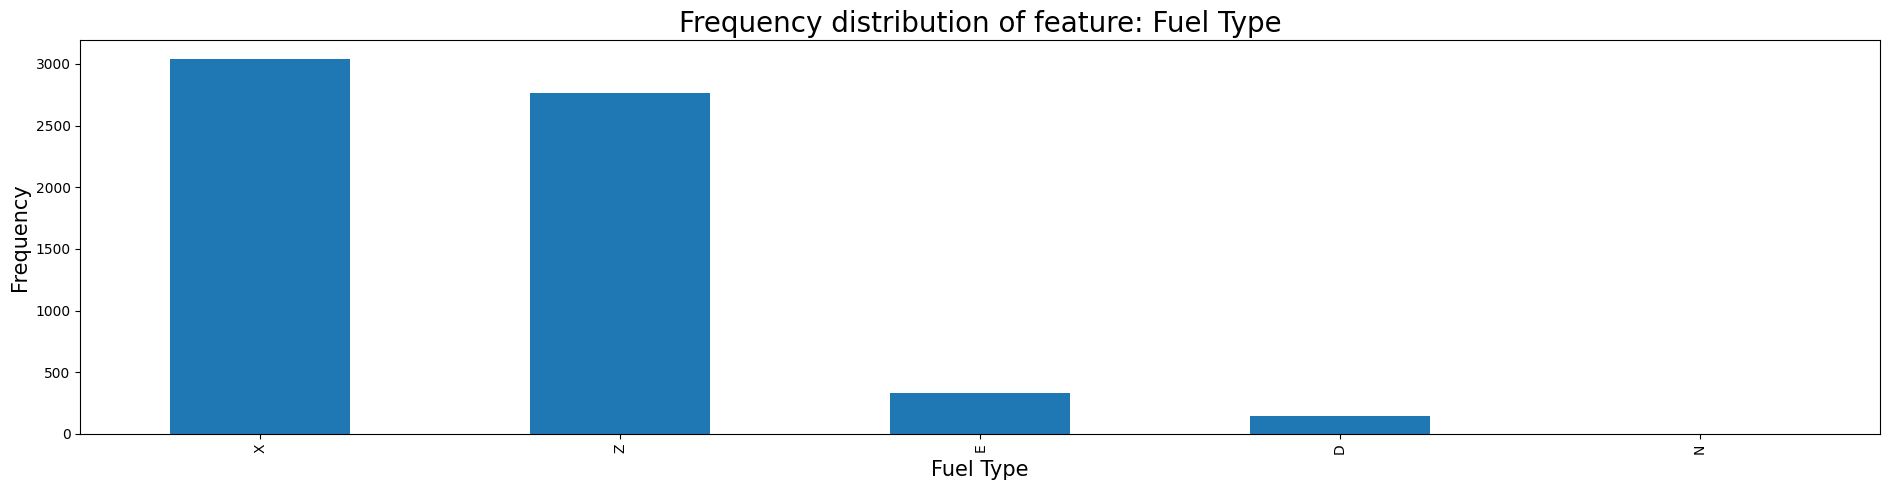

In [20]:
for col in dataset.select_dtypes(include="object").columns:
  plt.figure(figsize=(19,5))
  dataset.groupby(col)[col].count().sort_values(ascending=False).plot(kind="bar")
  plt.title("Frequency distribution of feature: "+col, fontsize=20)
  plt.ylabel("Frequency", fontsize=15)
  plt.xlabel(col, fontsize=15)
  plt.xticks(rotation=90)
  plt.tight_layout()
  plt.show()

**Inferences**:
1. Out of the 42 car brands Ford(628) and Chevrolet(588) are the most dominating ones. Whereas cars of Smart(7), Bugati(3) and SRT(2) are the ones with lowest frequency.
2. SUV-Small(1217) and MID-Size(1133) vehicles are the most frequent ones on Canadian roads.
3. Frequency of car with Transmission type Automatic with Select Shift(3127) is the highest and with Continuously Variable Transmission(576) is the lowest.
4. Car which runs on Gasoline let it be X(3637) or Z(3202) is the most common type. And cars running on D(175) are very low in frquency and there is only one sample which uses N.

### Exploring the impact of Numerical features

#### Correlation Table

In [21]:
dataset[dataset.describe().columns].corr()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.928843,0.834228,0.766817,0.820146,-0.762955,0.854802
Cylinders,0.928843,1.000000,0.801277,0.717647,0.781099,-0.723731,0.834687
Fuel Consumption City (L/100 km),0.834228,0.801277,1.000000,0.950811,0.994052,-0.927640,0.918756
Fuel Consumption Hwy (L/100 km),0.766817,0.717647,0.950811,1.000000,0.978607,-0.891892,0.883424
Fuel Consumption Comb (L/100 km),0.820146,0.781099,0.994052,0.978607,1.000000,-0.925801,0.916840
Fuel Consumption Comb (mpg),-0.762955,-0.723731,-0.927640,-0.891892,-0.925801,1.000000,-0.906783
CO2 Emissions(g/km),0.854802,0.834687,0.918756,0.883424,0.916840,-0.906783,1.000000


#### Correlation Heatmap

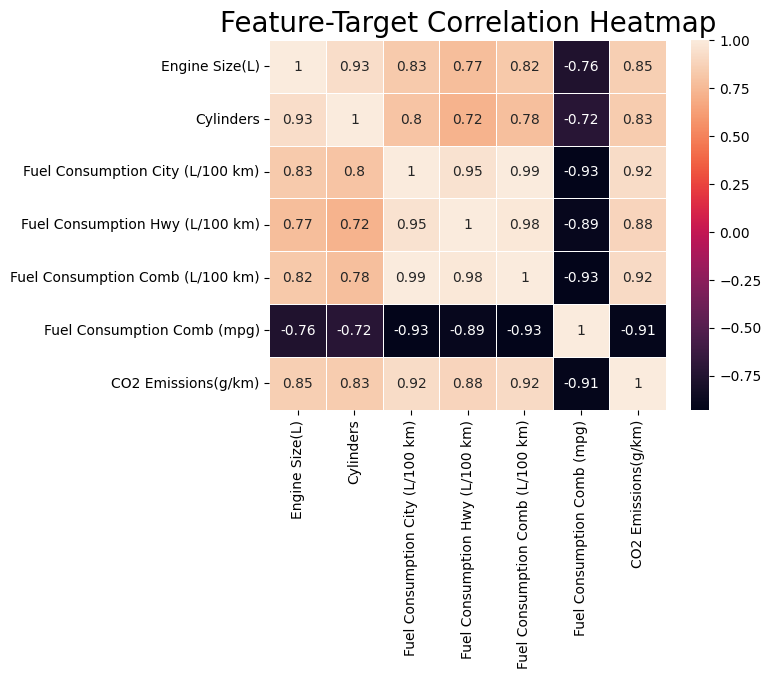

In [22]:
sns.heatmap(dataset.select_dtypes(include=np.number).corr(), linewidths=0.5, annot=True)
plt.title("Feature-Target Correlation Heatmap", fontsize=20)
plt.show()

#### Pairplot

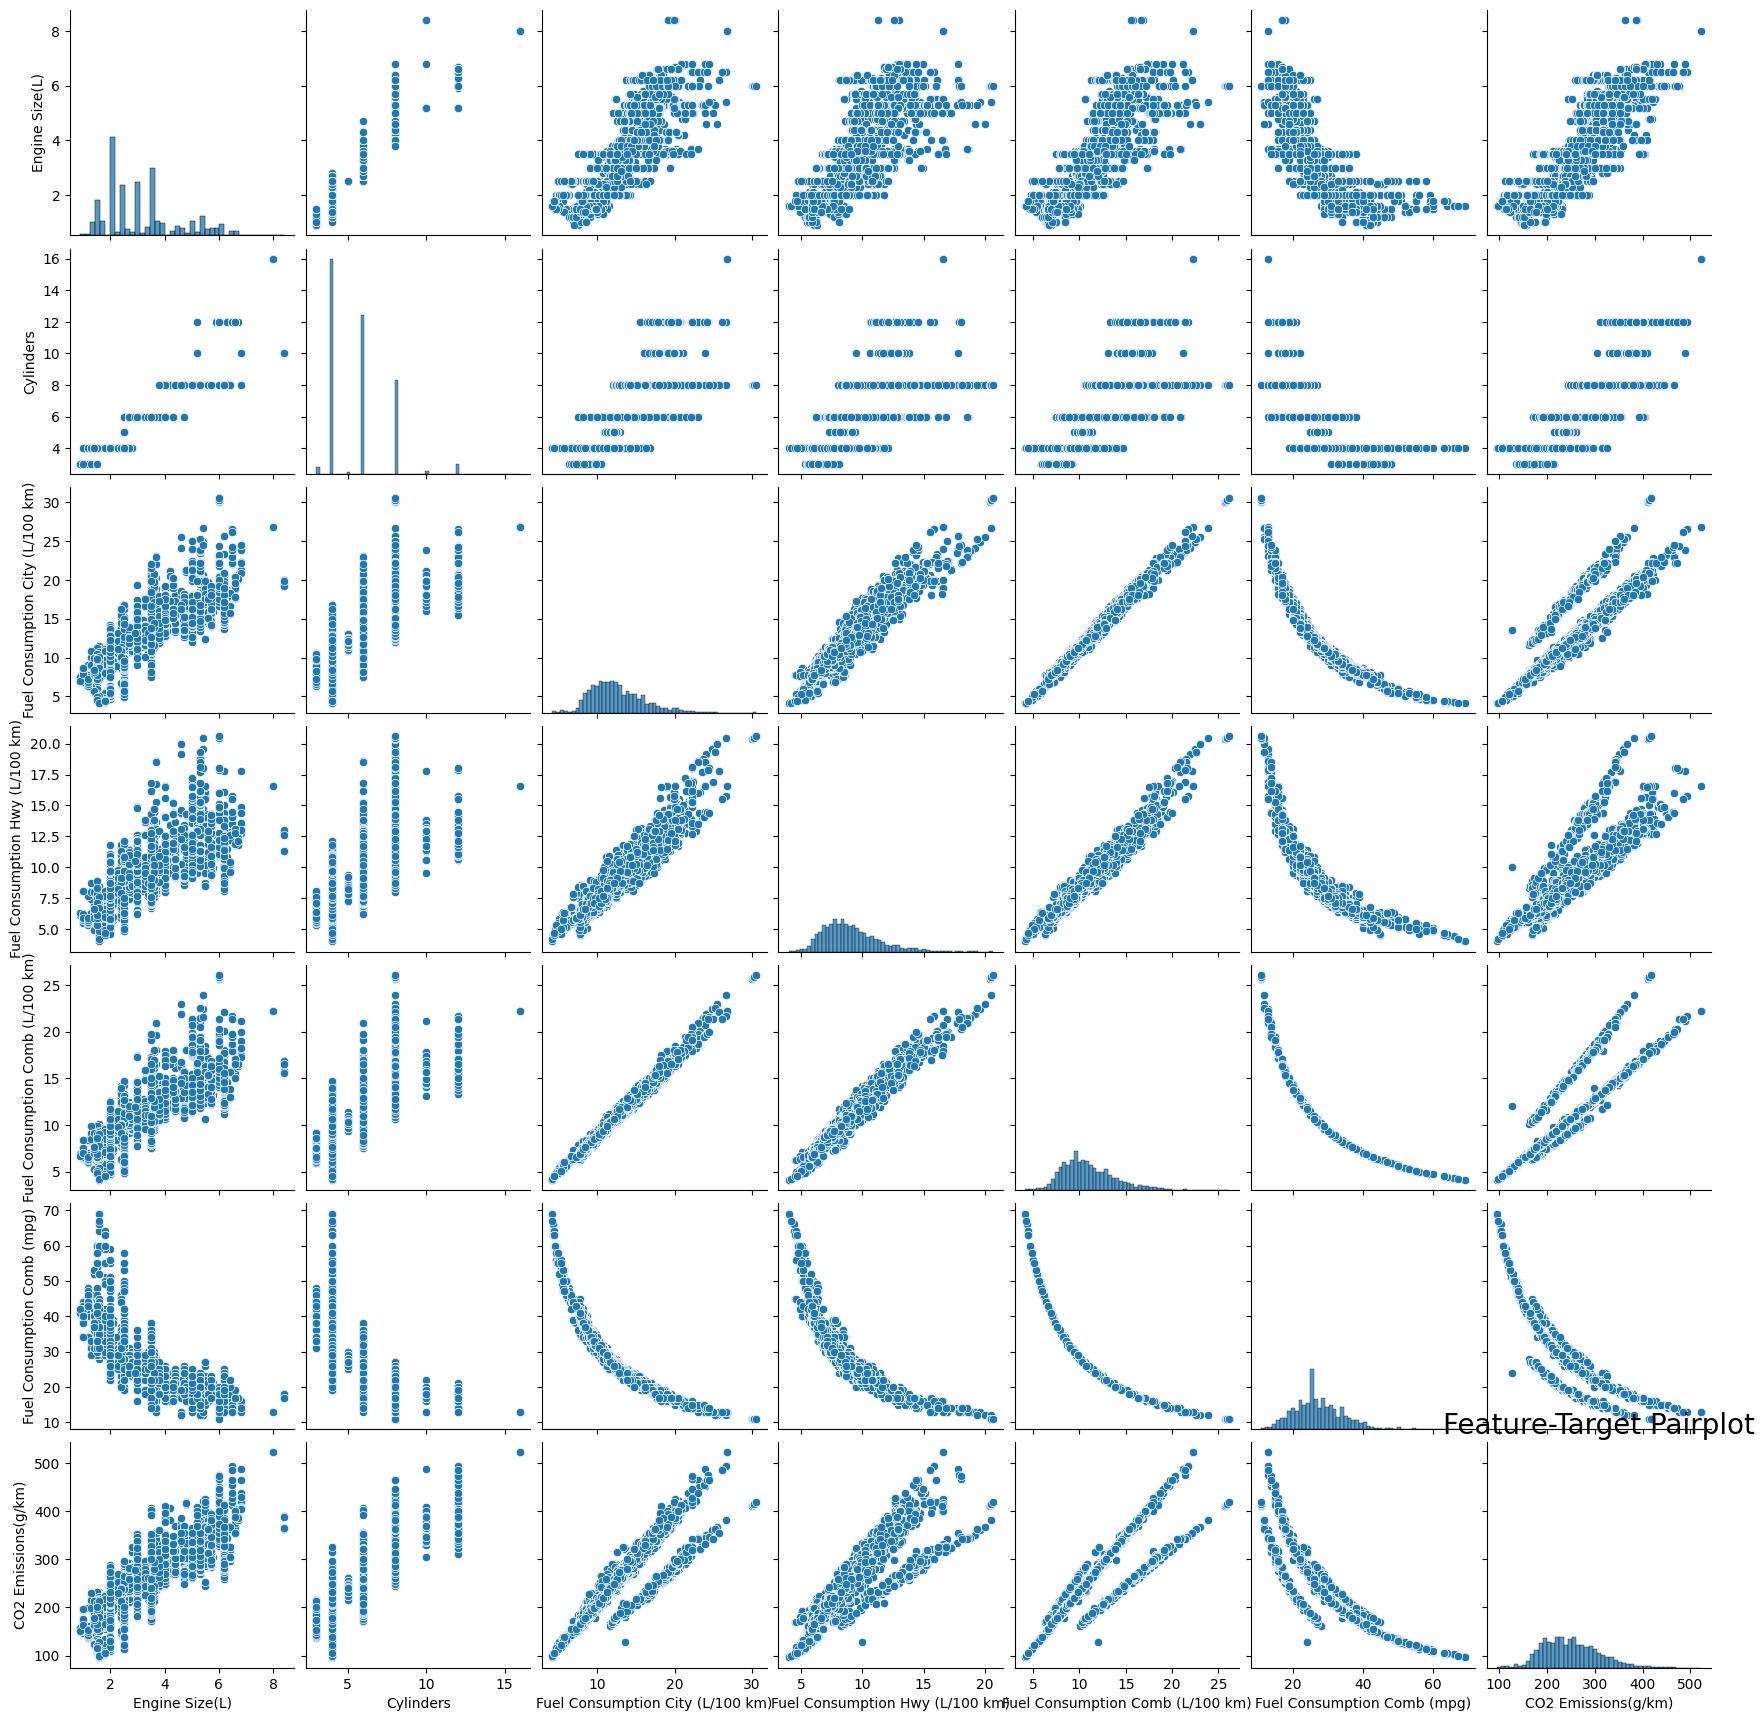

In [23]:
sns.pairplot(dataset.select_dtypes(include=np.number))
plt.title("Feature-Target Pairplot", fontsize=20)
plt.show()

**Inference**: 
1. We see an increase in *CO2 Emissions* with increasing *Engine Size* and *Cylinders* (positive correlation).
2. Emission increases with increase in Fuel Consumption (City, Hwy, Comb (L/100km)).
3. Emission decreases with increase in Fuel Consumption Comb (mpg).

## Outlier Detection - Box Plots

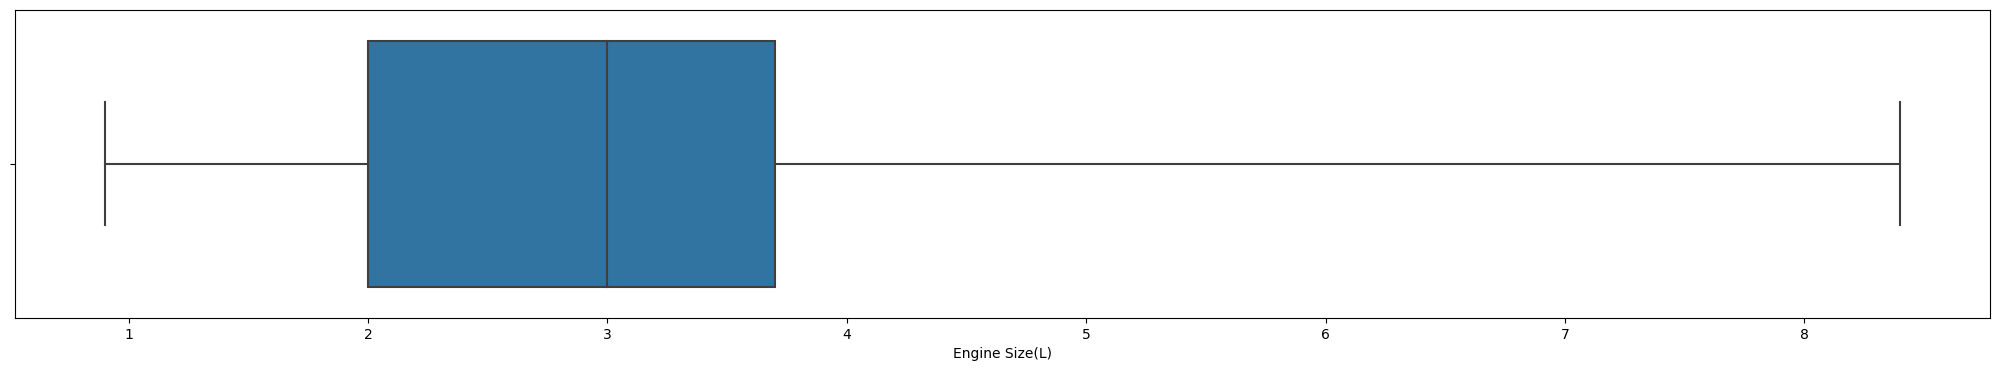

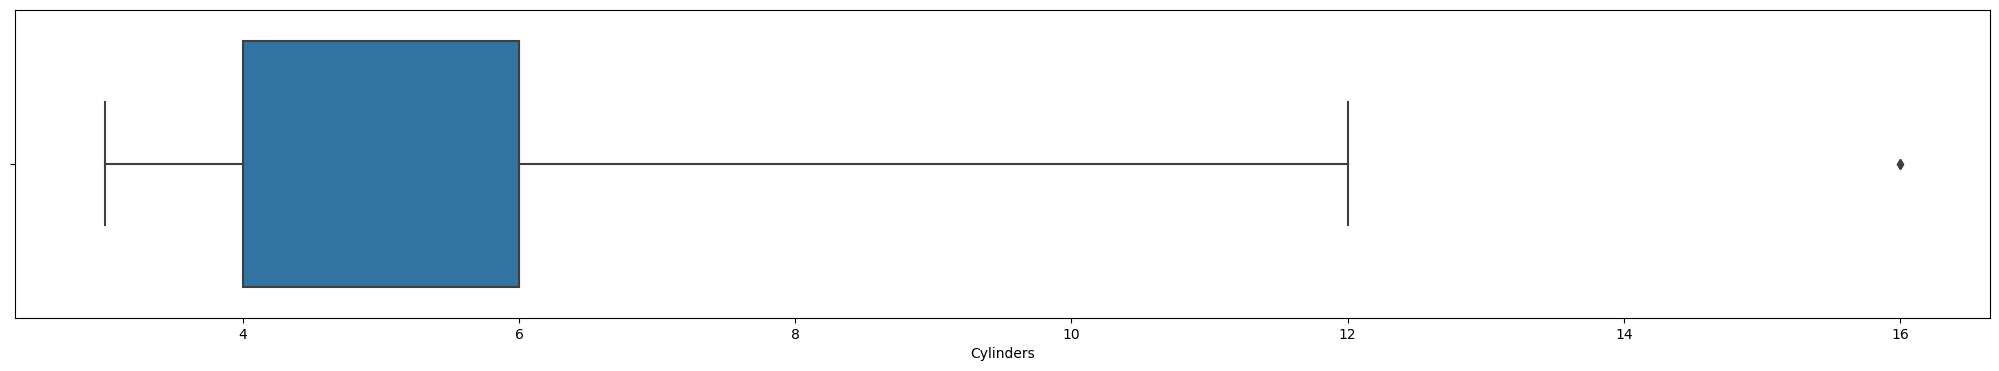

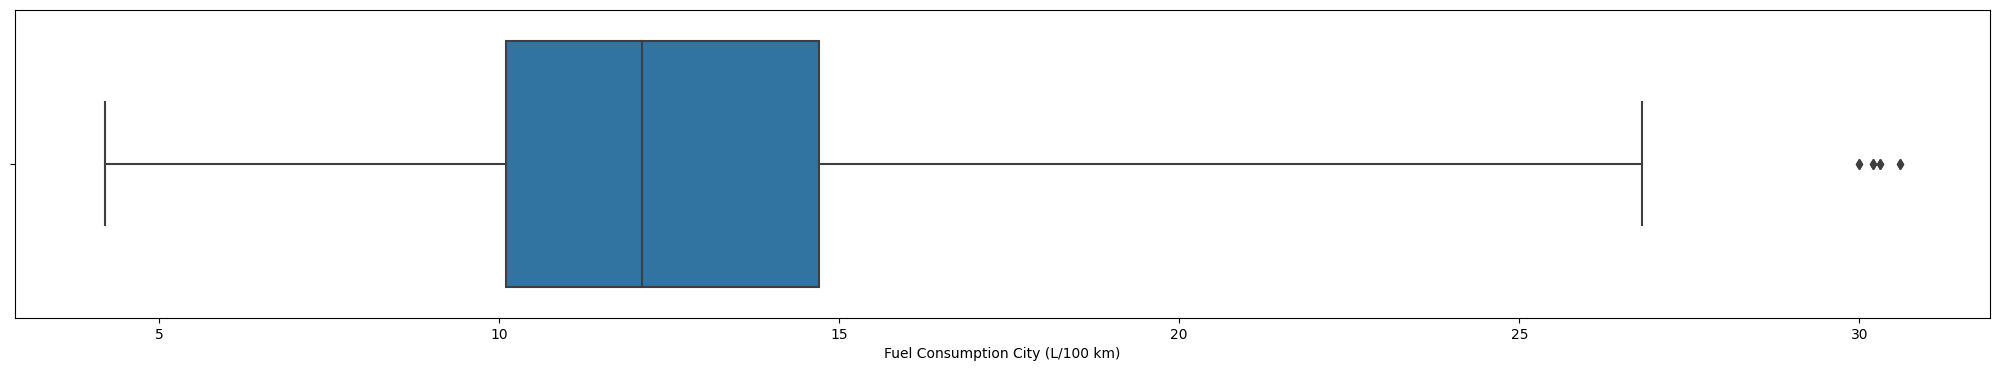

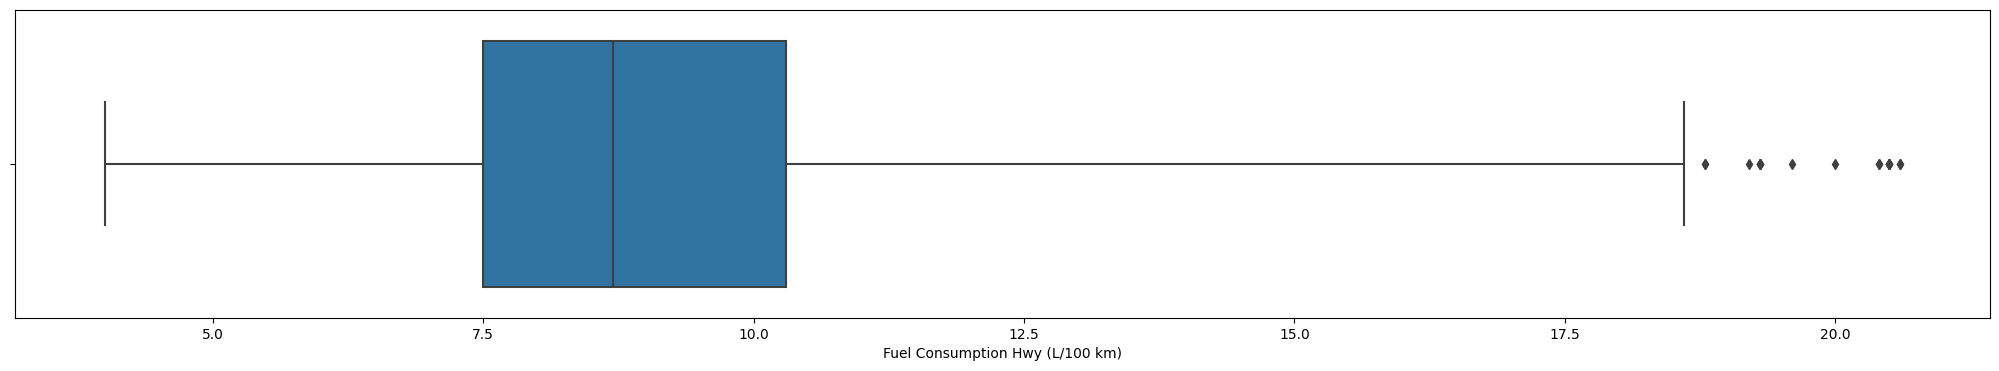

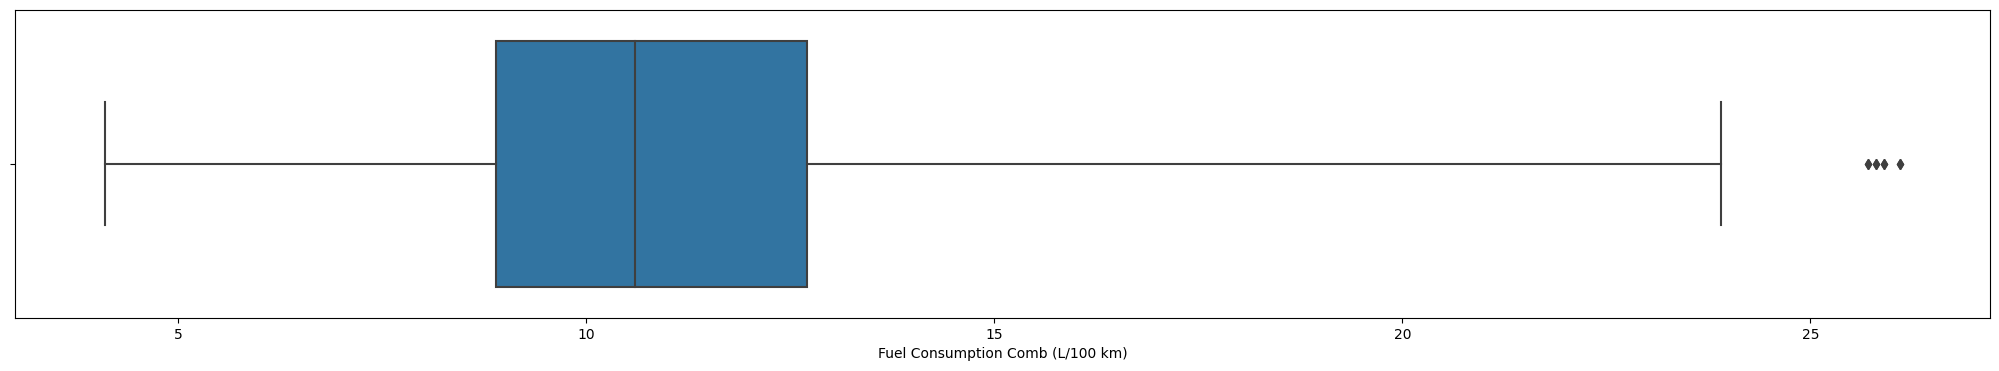

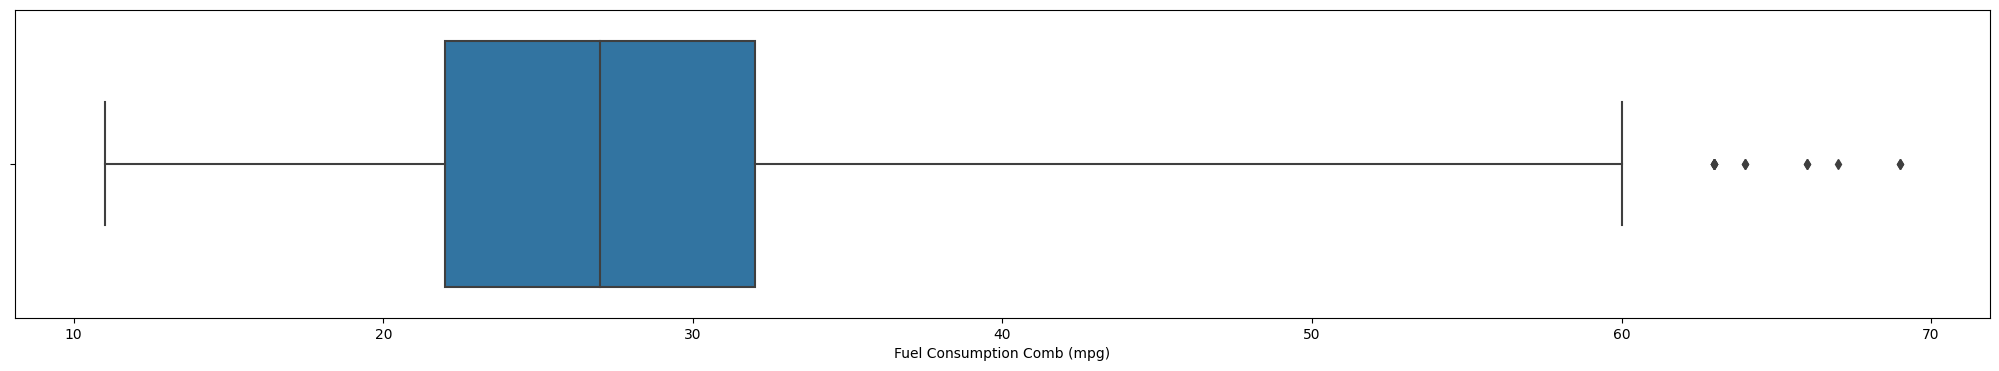

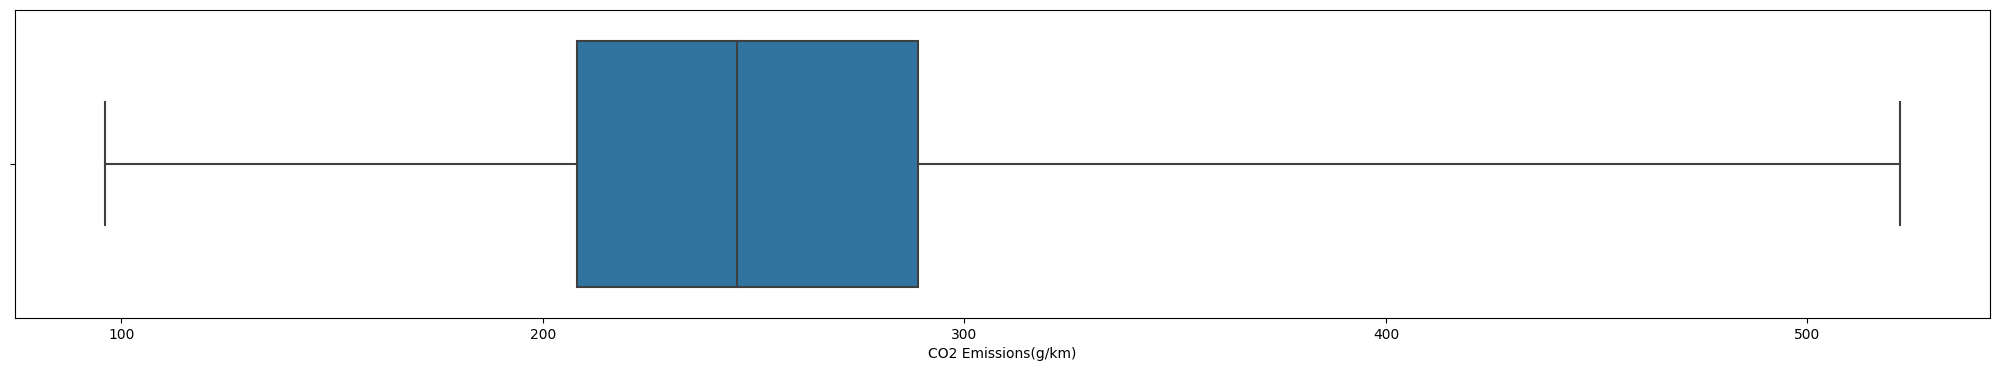

In [24]:
index=0
for feature in dataset.select_dtypes(include=np.number).columns:
    index+=1
    plt.figure(figsize=(40,40))
    plt.subplot((len(dataset.columns)),2,index)
    sns.boxplot(x=feature,data=dataset,whis=3) 
        
    plt.tight_layout()
    
    plt.show()

**Inference**: For proper representation in the dataset, these outliers are important and should not be removed.

## Renaming Columns in the dataset

In [6]:
# Change the column names and makes them useful for the future
renamed_columns = {
  'Make' : "make",
  'Vehicle Class': 'vehicle_class',
  'Engine Size(L)': 'engine_size',
  'Cylinders': 'cylinders',
  'Transmission' : 'transmission',
  'Fuel Type': 'fuel_type',
  'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
  'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
  'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
  'Fuel Consumption Comb (mpg)': 'fuel_cons_comb_mpg',
  'CO2 Emissions(g/km)': 'co2'
}
dataset["Fuel Type"] = np.where(dataset["Fuel Type"]=="Z", "premium_gasoline", dataset["Fuel Type"])
dataset["Fuel Type"] = np.where(dataset["Fuel Type"]=="X", "regular_gasoline", dataset["Fuel Type"])
dataset["Fuel Type"] = np.where(dataset["Fuel Type"]=="D", "diesel", dataset["Fuel Type"])
dataset["Fuel Type"] = np.where(dataset["Fuel Type"]=="E", "ethanol", dataset["Fuel Type"])
dataset["Fuel Type"] = np.where(dataset["Fuel Type"]=="N", "natural_gas", dataset["Fuel Type"])
dataset.rename(renamed_columns, axis='columns', inplace=True)
dataset

,make,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
0,ACURA,COMPACT,2.0,4,automatic_with_select_shift,premium_gasoline,9.9,6.7,8.5,33,196
1,ACURA,COMPACT,2.4,4,manual,premium_gasoline,11.2,7.7,9.6,29,221
2,ACURA,COMPACT,1.5,4,continuously_variable,premium_gasoline,6.0,5.8,5.9,48,136
3,ACURA,SUV - SMALL,3.5,6,automatic_with_select_shift,premium_gasoline,12.7,9.1,11.1,25,255
4,ACURA,SUV - SMALL,3.5,6,automatic_with_select_shift,premium_gasoline,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,SUV - SMALL,2.0,4,automatic_with_select_shift,premium_gasoline,10.7,7.7,9.4,30,219
7381,VOLVO,SUV - SMALL,2.0,4,automatic_with_select_shift,premium_gasoline,11.2,8.3,9.9,29,232
7382,VOLVO,SUV - SMALL,2.0,4,automatic_with_select_shift,premium_gasoline,11.7,8.6,10.3,27,240
7383,VOLVO,SUV - STANDARD,2.0,4,automatic_with_select_shift,premium_gasoline,11.2,8.3,9.9,29,232


## Adding Dummies for Categorical Data
We add dummy 1-hot encoded columns for the categorical data in our dataset to convert them into numerical values to be used in our models.

In [7]:
dataset = pd.get_dummies(dataset, drop_first=True, columns=["make", "vehicle_class", "transmission", "fuel_type"])
dataset

,engine_size,cylinders,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2,make_ALFA ROMEO,make_ASTON MARTIN,make_AUDI,...,vehicle_class_VAN - CARGO,vehicle_class_VAN - PASSENGER,transmission_automatic,transmission_automatic_with_select_shift,transmission_continuously_variable,transmission_manual,fuel_type_ethanol,fuel_type_natural_gas,fuel_type_premium_gasoline,fuel_type_regular_gasoline
0,2.0,4,9.9,6.7,8.5,33,196,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,2.4,4,11.2,7.7,9.6,29,221,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,1.5,4,6.0,5.8,5.9,48,136,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,3.5,6,12.7,9.1,11.1,25,255,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,3.5,6,12.1,8.7,10.6,27,244,False,False,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30,219,False,False,False,...,False,False,False,True,False,False,False,False,True,False
7381,2.0,4,11.2,8.3,9.9,29,232,False,False,False,...,False,False,False,True,False,False,False,False,True,False
7382,2.0,4,11.7,8.6,10.3,27,240,False,False,False,...,False,False,False,True,False,False,False,False,True,False
7383,2.0,4,11.2,8.3,9.9,29,232,False,False,False,...,False,False,False,True,False,False,False,False,True,False


## Saving Preprocessed Dataset

In [8]:
dataset.to_csv("Team16_Preprocessed.csv")

## Defining Test Train Split Function

In [1]:
import numpy as np
import pandas as pd
# random state provides reproducible results through seed
# this is also used in train validation split
def test_train_split(dataset: pd.DataFrame, test_size = 0.20, random_state = 0):
  np.random.seed(random_state)
  # shuffle indices
  indices = np.random.permutation(len(dataset)).tolist()
  dataset_test_size = int(dataset.shape[0]*test_size)

  # separating test-train indices
  test_indices = indices[:dataset_test_size]
  train_indices = indices[dataset_test_size:]
  return (dataset.iloc[test_indices], dataset.iloc[train_indices])

## Defining Standardization Function

In [2]:
def standardize(data: pd.DataFrame, skip: str|None = None) -> None:
  for col in data.columns:
    if skip != col:
      # standardizing data
      data[col] = (data[col] - data[col].mean())/data[col].std()

## Defining Metric Functions

In [3]:
def MSE(Y_pred: np.ndarray, Y_test: np.ndarray) -> float:
  return np.sum(np.square(Y_pred-Y_test))/Y_test.shape[0]

def rsquared_score(Y_pred: np.ndarray, Y_test: np.ndarray) -> float:
  data_var = np.sum((Y_test-np.mean(Y_test,axis=0))**2)
  model_var = np.sum((Y_pred-Y_test)**2)
  expl_var = data_var-model_var
  return float(expl_var/data_var)

# ***2. ML Model 1***
## Support Vector Regression

### Defining Kernels

In [9]:
def poly_kernel(x: np.ndarray, z: np.ndarray, degree: float, intercept: float) -> np.ndarray:
  return (np.matmul(x, z.T) + intercept) ** degree

def gaussian_kernel(x: np.ndarray, z: np.ndarray, sigma: float) -> np.ndarray:
  n = x.shape[0]
  m = z.shape[0]
  x2 = np.dot(np.sum(x ** 2, 1).reshape(n, 1), np.ones((1, m)))
  z2 = np.dot(np.sum(z ** 2, 1).reshape(m, 1), np.ones((1, n)))     
  return np.exp(-(x2 + z2.T - 2 * np.dot(x, z.T)) / (2 * sigma ** 2))

def linear_kernel(x: np.ndarray, z: np.ndarray) -> np.ndarray:
  return np.matmul(x, z.T)

### Defining SVR function
Out of epsilon, nu, and least squares SVRs; we select the epsilon SVR for this project. Epsilon SVR gives us direct control over the accuracy of the model, by controlling the allowed error. Although, this may lead to complex models (with lot of support vectors).

In [26]:
import pandas as pd
from typing import Callable

def svr_train(X_train: np.ndarray, Y_train: np.ndarray, kernel: Callable[[np.ndarray, np.ndarray], np.ndarray], C=1.0, epsilon=0.1, random_seed=0, max_iter=-1, E_toler=0.001):
  # variable initialization
  np.random.seed(random_seed)
  n_samples, m_features = X_train.shape
  kerneled_matrix = kernel(X_train, X_train)
  is_changed = np.zeros(n_samples)
  alphas = np.zeros(n_samples)
  b = 0.0
  iter_num = 1
  alphas_pairs_changed = 0

  # smo training
  while alphas_pairs_changed > 0 or iter_num == 1:
    alphas_pairs_changed = 0

    if iter_num == 1:
      seq_SV = list(range(n_samples))
    else:
      seq_SV = np.nonzero((alphas > -C)*(alphas < C))[0]

    for i in seq_SV:
      # Calculate error at index i
      Ei = alphas.dot(kerneled_matrix[i].T) + b - Y_train[i]
      # Check KKT conditions
      condition_1 = alphas[i] == 0 and abs(Ei) < (epsilon + E_toler)
      condition_2 = alphas[i] != 0 and abs(alphas[i]) < C and\
          abs(Ei) <= (epsilon + E_toler) and abs(Ei) >= (epsilon - E_toler)
      condition_3 = abs(alphas[i]) == C and abs(Ei) > (epsilon - E_toler)
      if (condition_1 or condition_2 or condition_3):
        continue
      
      # select a j (another data sample)
      j = Ej = -1
      changed_seq = np.nonzero(is_changed)[0]
      if changed_seq.shape[0] == 0:
        random_seq = np.arange(n_samples)
        random_seq = np.append(random_seq[:i], random_seq[i+1:])
        j = np.random.choice(random_seq)
        # error at new index j
        Ej = alphas.dot(kerneled_matrix[j].T) + b - Y_train[j]
      else:
        max_step = -np.inf
        for c in changed_seq:
          if c == i:
            continue
          temp_error = alphas.dot(kerneled_matrix[c].T) + b - Y_train[c]
          temp_step = abs(temp_error - Ei)
          # take the j and Ej with max step (|Ej - Ei|)
          if temp_step > max_step:
            max_step = temp_step
            j, Ej = c, temp_error
      
      # all of the support vectors now pass the KKT conditions
      if j == -1:
        break
      
      # Save the old i and j
      alpha_i_old = alphas[i].copy()
      alpha_j_old = alphas[j].copy()
      # Calculate the lower and upper bound
      lower_bound = max(-C, alpha_i_old + alpha_j_old - C)
      upper_bound = min(C, alpha_i_old + alpha_j_old + C)

      # This may not happen, but if the lower_bound equals to upper_bound, continue
      if lower_bound == upper_bound:
        continue

      # Calculate eta
      eta = kerneled_matrix[i, i] + kerneled_matrix[j, j] - 2.0 * kerneled_matrix[i, j]
      # May not happen
      if eta <= 0:
        continue

      # update j
      is_j_update = False
      I = alpha_i_old + alpha_j_old
      for sgn in [-2, 0, 2, -1, 1]:
        temp_j = alpha_j_old + (Ei - Ej + epsilon)
        if np.sign(I - temp_j) - np.sign(temp_j) == sgn:
          alphas[j] = temp_j
          is_j_update = True
          break
      if not is_j_update:
        continue

      alphas[j] = max(min(alphas[j], upper_bound), lower_bound)
      if abs(alphas[j] - alpha_j_old) < 1e-5:
        is_changed[j] = 1
        continue
      # update i
      alphas[i] += alpha_j_old - alphas[j]

      # Calculate bi and bj
      bi = -(Ei + (alphas[i] - alpha_i_old) * kerneled_matrix[i, i]\
          + (alphas[j] - alpha_j_old) * kerneled_matrix[i, j]) + b
      bj = -(Ei + (alphas[i] - alpha_i_old) * kerneled_matrix[i, j]\
          + (alphas[j] - alpha_j_old) * kerneled_matrix[j, j]) + b
      
      # Check if bi or bj is avaliable (alpha is within bounds)
      if abs(alphas[i]) < C:
        b = bi
      elif abs(alphas[j]) < C:
        b = bj
      else:
        b = (bi + bj) / 2

      is_changed[i] = 1
      is_changed[j] = 1
      alphas_pairs_changed += 1

    iter_num += 1
    if max_iter != -1 and iter_num > max_iter:
      break
  
  return alphas, b

def svr_predict(X_train: np.ndarray, X_test: np.ndarray, alphas: np.ndarray, b: float, kernel: Callable[[np.ndarray, np.ndarray], np.ndarray]) -> np.ndarray:
  return alphas @ kernel(X_train, X_test) + b

# function to predict svr trained point
data = pd.read_csv("Team16_Preprocessed.csv", index_col=0, header=0)
standardize(data, skip = 'co2')
Y = data['co2']
X = data.drop(['co2'], axis = 1)

test, train = test_train_split(data)
Y_train = train['co2'].to_numpy()
X_train = train.drop(['co2'], axis = 1).to_numpy()
Y_test = test['co2'].to_numpy()
X_test = test.drop(['co2'], axis = 1).to_numpy()

# hyper params: c, kernel_param, epsilon
kernel = lambda x, y: gaussian_kernel(x, y, 1/len(X_train))
alphas, b = svr_train(X_train, Y_train, kernel, 100)
Y_pred = svr_predict(X_train, X_test, alphas, b, kernel)
print("my alphas:", alphas, "b:", b)
print(MSE(Y_pred, Y_test))
print(rsquared_score(Y_pred, Y_test))


11my alphas: [  1.09998526   8.1        -80.9        ...   0.           0.
   0.        ] b: 263.09998312814133
11my alphas: [  1.09998526   8.1        -80.9        ...   0.           0.
   0.        ] b: 263.09998312814133
my alphas: [  1.09998526   8.1        -80.9        ...   0.           0.
   0.        ] b: 263.09998312814133
3648.6674834220776
-0.029427258144272352


# ***3. ML Model 2***
## Decision Tree Regression

In [31]:
class TreeNode:
  def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
    self.feature = feature
    self.threshold = threshold
    self.left = left
    self.right = right
    self.value = value

class DecisionTree:
  def __init__(self, max_depth=20, min_samples=10):
      self.max_depth = max_depth
      self.min_samples = min_samples
      self.tree = []
  
  def fit(self, X_train: np.ndarray, Y_train: np.ndarray):
    self.tree = self.grow_tree(X_train, Y_train)
  
  def predict(self, X_test: np.ndarray):
    return np.array([self.traverse_tree(row, self.tree) for row in X_test])
  
  def best_split(self, X: np.ndarray, y: np.ndarray):
    best_feature: int|None = None
    best_threshold: float|None = None
    best_gain = -1
    
    # go through all features (and thresholds) and find the split with the best gain
    for i in range(X.shape[1]):
      thresholds = np.unique(X[:, i])
      for threshold in thresholds:
        gain = self.split_gain(X[:, i], y, threshold)
        if gain > best_gain:
          best_gain = gain
          best_feature = i
          best_threshold = threshold
    return best_feature, best_threshold
  
  def split_gain(self, X_column, y, threshold):
    # define a impurity finding function
    def impurity(samples: np.ndarray) -> float:
      s_avg = np.mean(samples)
      # consider the mean absolute error as the impurity measure
      return np.mean(np.abs(samples - s_avg))
    
    n = len(y)
    parent_imp = impurity(y)
    
    left_indexes = np.argwhere(X_column <= threshold).flatten()
    right_indexes = np.argwhere(X_column > threshold).flatten()
    child_imp = 0.0
    
    # take child's impurity's weighted average across the two way split
    if len(left_indexes) != 0:
      child_imp += (len(left_indexes) / n) * impurity(y[left_indexes])
    if len(right_indexes) != 0:
      child_imp += (len(right_indexes) / n) * impurity(y[right_indexes])
        
    return parent_imp - child_imp
  
  def grow_tree(self, X, y, depth=0):
    n_samples, m_features = X.shape
      
    if n_samples <= self.min_samples or depth >= self.max_depth:
      return TreeNode(value = np.mean(y))
      
    best_feature, best_threshold = self.best_split(X, y)
      
    left_indexes = np.argwhere(X[:, best_feature] <= best_threshold).flatten()
    right_indexes = np.argwhere(X[:, best_feature] > best_threshold).flatten()
      
    if len(left_indexes) == 0 or len(right_indexes) == 0:
      return TreeNode(value=np.average(y))
    
    # build the tree on both children with remaining samples
    left = self.grow_tree(X[left_indexes, :], y[left_indexes], depth+1)
    right = self.grow_tree(X[right_indexes, :], y[right_indexes], depth+1)

    # return the current node
    return TreeNode(best_feature, best_threshold, left, right)
  
  def traverse_tree(self, x: np.ndarray, tree: list[TreeNode]):
    # return the value of the node if we reach a leaf
    if tree.value is not None:
      return tree.value
    # else continue travers
    if x[tree.feature] <= tree.threshold:
      return self.traverse_tree(x, tree.left)
    return self.traverse_tree(x, tree.right)
  

# max depth and min samples per leaf are hyperparams
cl = DecisionTree()
cl.fit(X_train, Y_train)
Y_pred = cl.predict(X_test)
print(MSE(Y_pred, Y_test))
print(rsquared_score(Y_pred, Y_test))

29.148483880023527
0.9917761089559379


# ***4. ML Model 3***
## Random Forest Regressor

In [33]:
class RandomForest():
  def __init__(self, n_estimators, sample_size=None, min_leaf=3, max_depth=10):
    self.n_estimators = n_estimators
    self.sample_size = sample_size
    self.min_leaf = min_leaf
    self.max_depth = max_depth
    self.trees = None

  def fit(self, X_train: np.ndarray, Y_train: np.ndarray, random_seed=0):
    self.trees = []
    np.random.seed(random_seed)
    if self.sample_size is None:
      self.sample_size = len(X_train)
    for _ in range(self.n_estimators):
      indexes = np.random.randint(len(Y_train), size=self.sample_size)
      dt = DecisionTree(self.max_depth, self.min_leaf)
      dt.fit(X_train[indexes], Y_train[indexes])
      self.trees.append(dt)

  def predict(self, x):
    tree_predictions = np.array([tree.predict(x) for tree in self.trees])
    prediction = np.mean(tree_predictions, axis=0)
    return prediction

# max depth, min samples per leaf, sample size per tree and no of estimators are hyperparams
cl = RandomForest(n_estimators=25, sample_size=len(X_train))
cl.fit(X_train, Y_train)
Y_pred = cl.predict(X_test)
print(MSE(Y_pred, Y_test))
print(rsquared_score(Y_pred, Y_test))

19.77786036358536
0.9944199166795682


# ***5. ML Model 4 (Based on research literature)***
## XGBoost

In [6]:
import numpy as np
import pandas as pd

class Node:
  def __init__(self, x, y, grad, hess, depth = 6, gamma = 0, min_child_weight = 1, lambda_ = 1, colsample = 1):
      self.x = x
      self.y = y
      self.grad = grad
      self.hess = hess
      self.depth = depth
      self.gamma = gamma
      self.lambda_ = lambda_
      self.min_child_weight = min_child_weight
      self.colsample = colsample
      self.cols = np.random.permutation(x.shape[1])[:round(colsample * x.shape[1])]
      self.sim_score = self.similarity_score([True]*x.shape[0])
      self.gain = float("-inf")
      
      self.split_col = None
      self.split_row = None
      self.lhs_tree = None
      self.rhs_tree = None
      self.pivot = None
      self.val = None
      # making split
      self.split_node()
      
      if self.is_leaf:
          self.val = - np.sum(grad) / (np.sum(hess) + lambda_)
      
  
  def split_node(self):
      
      self.find_split()
      
      # checking whether it's a leaf or not
      if self.is_leaf:
          return
      
      x = self.x[:, self.split_col]
      
      lhs = x <= x[self.split_row]
      rhs = x > x[self.split_row]
      
      # creating further nodes recursivly
      self.lhs_tree = Node(
          self.x[lhs],
          self.y[lhs],
          self.grad[lhs],
          self.hess[lhs],
          depth = self.depth - 1,
          gamma = self.gamma,
          min_child_weight = self.min_child_weight,
          lambda_ = self.lambda_,
          colsample = self.colsample
      )
      
      self.rhs_tree = Node(
          self.x[rhs],
          self.y[rhs],
          self.grad[rhs],
          self.hess[rhs],
          depth = self.depth - 1,
          gamma = self.gamma,
          min_child_weight = self.min_child_weight,
          lambda_ = self.lambda_,
          colsample = self.colsample
      )
      
  def find_split(self):
      # iterate through every feature and row
      for c in self.cols:
          x = self.x[:, c]
          for row in range(self.x.shape[0]):
              pivot= x[row]
              lhs = x <= pivot
              rhs = x > pivot
              sim_lhs = self.similarity_score(lhs)
              sim_rhs = self.similarity_score(rhs)
              gain = sim_lhs + sim_rhs - self.sim_score - self.gamma
              
              if gain < 0 or self.not_valid_split(lhs) or self.not_valid_split(rhs):
                  continue
              
              if gain > self.gain:
                  self.split_col = c
                  self.split_row = row
                  self.pivot = pivot
                  self.gain = gain
                  
  def not_valid_split(self, masks):
      if np.sum(self.hess[masks]) < self.min_child_weight:
          return True
      return False
  
  @property
  def is_leaf(self):
      if self.depth < 0 or self.gain == float("-inf"):
          return True
      return False
              
  def similarity_score(self, masks):
      return  np.sum(self.grad[masks]) ** 2 / ( np.sum(self.hess[masks]) + self.lambda_ )
  
  
  def predict(self, x):
      return np.array([self.predict_single_val(row) for row in x])
  
  def predict_single_val(self, x):
      if self.is_leaf:
          return self.val
      
      return self.lhs_tree.predict_single_val(x) if x[self.split_col] <= self.pivot else self.rhs_tree.predict_single_val(x)

class XGBTree:
  def __init__(self, x, y, grad, hess, depth = 6, gamma = 0, min_child_weight = 1, lambda_ = 1, colsample = 1, subsample = 1):
      indices = np.random.permutation(x.shape[0])[:round(subsample * x.shape[0])]
      
      self.tree = Node(
          x[indices],
          y[indices],
          grad[indices],
          hess[indices],
          depth = depth,
          gamma = gamma,
          min_child_weight = min_child_weight,
          lambda_ =  lambda_,
          colsample = colsample,
      )
  
  def predict(self, x):
      return self.tree.predict(x)
  
class XGBRegressor:
  def __init__(self, eta = 0.3, n_estimators = 100, max_depth = 6, gamma = 0, min_child_weight = 1, lambda_ = 1, colsample = 1, subsample = 1):
      self.eta = eta
      self.n_estimators = n_estimators
      self.max_depth = max_depth
      self.gamma = gamma
      self.min_child_weight = min_child_weight
      self.lambda_ = lambda_
      self.colsample = colsample
      self.subsample = subsample
      self.history = {
          "train" : list(),
          "test" : list()
      }
      
      # list of all weak learners
      self.trees = list()
      
      self.base_pred = None
      
      
  
  def fit(self, x, y, eval_set = None):
      # checking Datatypes
      if isinstance(x, pd.DataFrame) or isinstance(x, pd.Series):
          x = x.values
      if not isinstance(x, np.ndarray):
          raise TypeError("Input should be pandas Dataframe/Series or numpy array.")
          
      if isinstance(y, pd.DataFrame) or isinstance(y, pd.Series):
          y = y.values
      if not isinstance(y, np.ndarray):
          raise TypeError("Input should be pandas Dataframe/Series or numpy array.")
      
      
      
      base_pred = np.full(y.shape, np.mean(y)).astype("float64")
      self.base_pred = np.mean(y)
      for n in range(self.n_estimators):
          grad = self.grad(y, base_pred)
          hess = self.hess(y, base_pred)
          estimator = XGBTree(
              x,
              y,
              grad,
              hess,
              depth = self.max_depth,
              gamma = self.gamma,
              min_child_weight = self.min_child_weight,
              lambda_ = self.lambda_,
              colsample = self.colsample,
              subsample = self.subsample
          )
          base_pred = base_pred + self.eta * estimator.predict(x)
          self.trees.append(estimator)
          
          if eval_set:
              X = eval_set[0]
              Y = eval_set[1]
              cost = np.sqrt(np.mean(self.loss(Y, self.predict(X))))
              self.history["test"].append(cost)
              print(f"[{n}] validation_set-rmse : {cost}", end="\t")
          
          cost = np.sqrt(np.mean(self.loss(y, base_pred)))
          self.history["train"].append(cost)
          print(f"[{n}] train_set-rmse : {cost}")
          
  def predict(self, x):
      base_pred = np.full((x.shape[0],), self.base_pred).astype("float64")
      for tree in self.trees:
          base_pred += self.eta * tree.predict(x)
      
      return base_pred
  
  def loss(self, y, a):
      return (y - a)**2
  
  def grad(self, y, a):
      # for 0.5 * (y - a)**2
      return a - y
  
  def hess(self, y, a):
      # for 0.5 * (y - a)**2
      return np.full((y.shape), 1)

cl = XGBRegressor(n_estimators=3)
cl.fit(X_train.to_numpy(), Y_train.to_numpy())
Y_pred = cl.predict(X_test.to_numpy())
print(MSE(Y_pred, Y_test))
print(rsquared_score(Y_pred, Y_test))

[0] train_set-rmse : 41.89579370905376
[1] train_set-rmse : 29.71747166638793
[2] train_set-rmse : 21.16882849494701
462.4983823826821
0.8695116932864969


# ***6. Comparison of insights drawn from the models***

# **_7. References_**

1.   List item
2.   List item

